shape is  (784, 15)
row is :  784
coloum is :  15


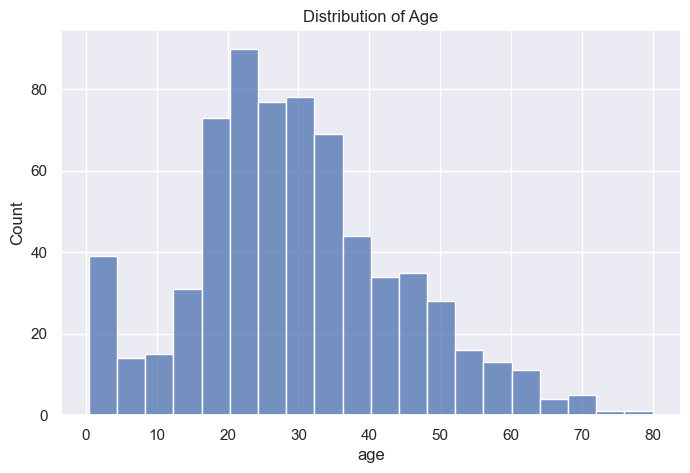

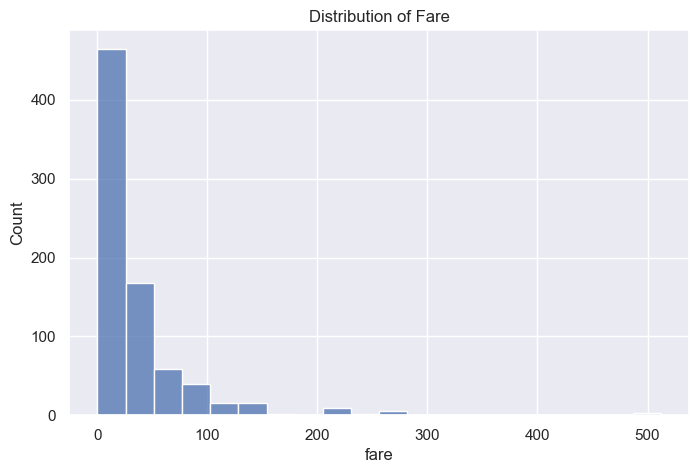

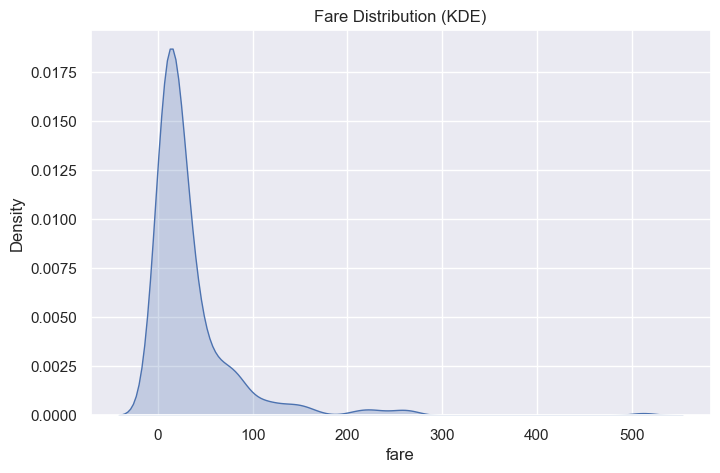

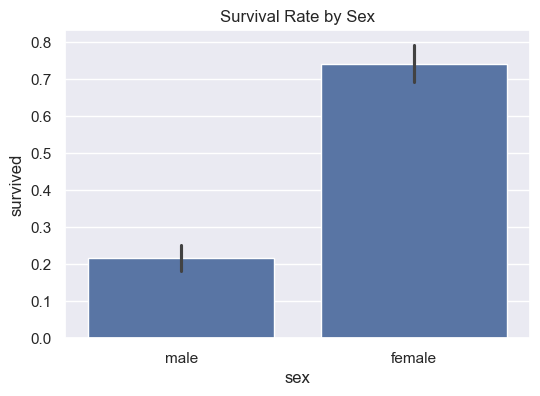

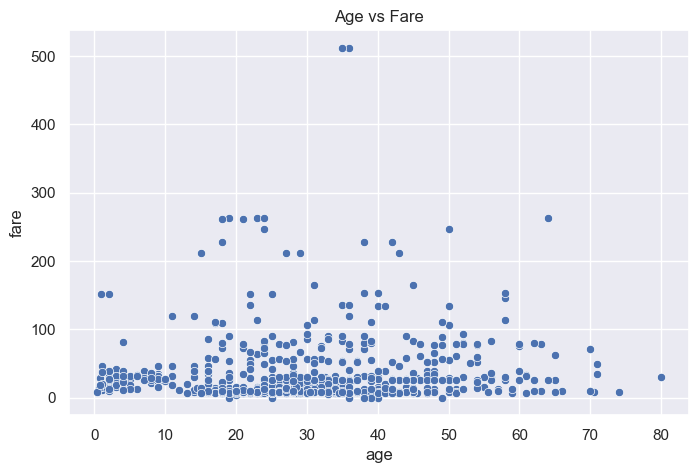

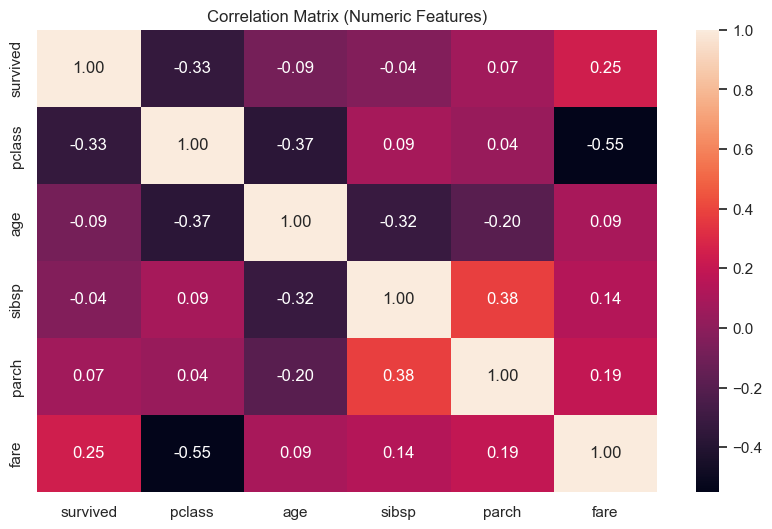

Time-Based Analysis: Not applicable (no Date column in Titanic dataset).


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


df = pd.read_csv("titanic.csv")
df.head()


df.isna().sum().sort_values(ascending=False)


df[df.duplicated()]
df = df.drop_duplicates()


print("shape is ", df.shape)
print("row is : ", df.shape[0])
print("coloum is : ", df.shape[1])


df.dtypes


df.describe(include="all")


if "Age" in df.columns:
    df["Age"] = df["Age"].fillna(df["Age"].median())

if "Embarked" in df.columns:
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

if "Fare" in df.columns:
    df["Fare"] = df["Fare"].fillna(df["Fare"].median())

df.isna().sum().sort_values(ascending=False)



plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=20)
plt.title("Distribution of Age")
plt.show()



plt.figure(figsize=(8,5))
sns.histplot(df["fare"], bins=20)
plt.title("Distribution of Fare")
plt.show()



plt.figure(figsize=(8,5))
sns.kdeplot(df["fare"], fill=True)
plt.title("Fare Distribution (KDE)")
plt.show()



plt.figure(figsize=(6,4))
sns.barplot(x="sex", y="survived", data=df)
plt.title("Survival Rate by Sex")
plt.show()


plt.figure(figsize=(8,5))
sns.scatterplot(x="age", y="fare", data=df)
plt.title("Age vs Fare")
plt.show()


numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"])
    df["Month"] = df["Date"].dt.to_period("M")
    monthly = df.groupby("Month")["Fare"].sum()

    plt.figure(figsize=(10,5))
    monthly.plot()
    plt.title("Monthly Trend")
    plt.ylabel("Sum")
    plt.show()
else:
    print("Time-Based Analysis: Not applicable (no Date column in Titanic dataset).")




